## 1- Edit <code>labels.txt</code>

Edit <code>darkflow/labels.txt</code> to match with your classes.

## 2- Edit cfg file

On <code>darkflow\cfg</code> create a copy (bacause we will need the original too) of the <code>yolov2-tiny-voc.cfg</code> and rename it <br>(e.g <code>yolov2-tiny-voc-c16.cfg</code> because I have 16 classes

Open with a text editor like Atom or Notepad++.

Go to the bootom and edit the <code>line 124</code> and put the amount of classes you have (e.g classes = 20 )

Now we need to alter the last layer's filter to match our amount of classes

Go to <code>line 118</code> the amount will be the result of this formula <code>(num classes + 5) * 5 </code>

Examples:
<br> 1 classe -> (1 + 5) * 5 = 30 -> filters=30
<br> 1 classe -> (20 + 5) * 5 = 125 -> filters=125

## 3- (Optional) Choosing another model

In this turorial we are using Tiny YoloV2 Weights and Cfg
<br>If you want to use other model download the Weights and Cfg from <code>https://pjreddie.com/darknet/yolo/</code>
<br>Put the Weight in the <code>darkflow/bin</code> folder and Cfg in the <code>darkflow/cfg</code> folder

## 4- Train our model

With conda activate tensor_yolo_1.15:
	<br> &emsp; On "cmd" type: cd /d "PATH TO THIS PROJECT" 	     (e.g     cd /d "D:\Projetos\Flutter\darkflow\" )
	<br> &emsp; On "cmd" type:

<code>python flow --model cfg/yolov2-tiny-voc-16.cfg --load bin/yolov2-tiny-voc.weights --train --annotation train/annotation --dataset train/Images --gpu 0.8 --epoch 1000</code>

Explanation:

<br><code>--model</code> Path to your modifed cfg (it will look for the original too)
<br><code>--load</code> Path to the pre trained wights
<br><code>-- train</code> Command to train
<br><code>--annotation</code> Path to the annotation's folder
<br><code>--dataset</code> Path to the images folder
<br><code>--gpu</code> Command to use the GPU, 0.8 means 80%, recommended to be safe since Windows use a bit of the GPU to function
<br><code>--epoch</code> Amount of training, default is 5000, but start with 1000 to see if everthing is working

On a Ryzen 3700x and 1660Ti training 1000 epochs took 30 min using GPU or 60 hours using CPU.

## 5- Test our model

With the training finished we should have <code>darkflow\ckpt folder</code>

### 5.1 Testing CKPT on Images

Prepare the <code>darkflow\sample_img</code> folder with some images

With conda activate tensor_yolo_1.15:
	<br> &emsp; On "cmd" type: cd /d "PATH TO THIS PROJECT" 	     (e.g     cd /d "D:\Projetos\Flutter\darkflow\" )
	<br> &emsp; On "cmd" type:

<code>python flow --imgdir sample_img/ --model cfg/yolov2-tiny-voc-16.cfg --load 10750 --gpu 0.8  --threshold 0.0</code>

Explanation:

<br><code>--model</code> Path to your modifed cfg
<br><code>--load</code> Path to your trained wights
<br><code>--imgdir</code> Path to the sample images folder
<br><code>--gpu</code> Command to use the GPU, 0.8 means 80%, recommended to be safe since Windows use a bit of the GPU to function
<br><code>threshold 0.0</code> Set so just confidence above this number will be return, 0.0 return all, up to 1.0 (100%)

You can also get the resuts in Json format by adding <code>--json</code>

In the example above we load our ckpt on checkpoint 10750 that is in our ckpt folder:

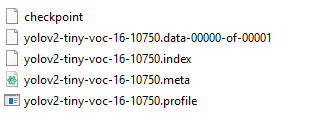

If everthing works right your input image should be transform into an output like this:

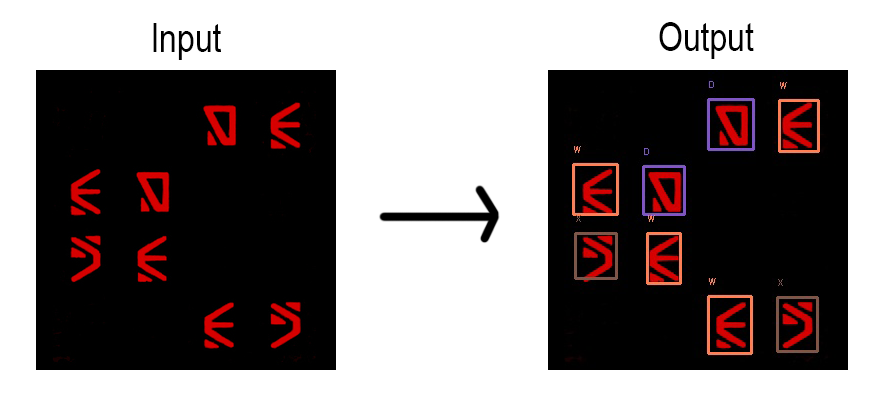

### 5.2 Testing CKPT on Video

You can also test using a video, but in my case it didn't work, it don't draw the boxes
But the command is the above:

<code>python flow --model cfg\yolov2-tiny-voc-16.cfg --load 10750 --demo G:\Download\video.avi --gpu 0.8 --saveVideo --threshold 0.0</code>

If you out of VRAM use CPU:

<code>python flow --model cfg\yolov2-tiny-voc-16.cfg --load 10750 --demo G:\Download\video.avi --saveVideo --threshold 0.0</code>

## 6- Convert to .pb

Also known as generate frozen graph or genarate saved model

With conda activate tensor_yolo_1.15:
	<br> &emsp; On "cmd" type: cd /d "PATH TO THIS PROJECT" 	     (e.g     cd /d "D:\Projetos\Flutter\darkflow\" )
	<br> &emsp; On "cmd" type:

<code>python flow --model cfg/yolov2-tiny-voc-16.cfg --load 10750 --savepb</code>

Explanation:

<br><code>--model</code> Path to your modifed cfg
<br><code>--load</code> Path to your trained wights
<br><code>--savepb</code> Command to save pb file

### 6.1 Testing .pb on Images

Similar to testing our CKPT model we can test our .pb:

<code>python flow --pbLoad built_graph/yolov2-tiny-voc-16.pb --metaLoad built_graph/yolov2-tiny-voc-16.meta --imgdir sample_img/</code>

## 7- Convert to TFLite

With conda activate tensor_yolo_1.15:
	<br> &emsp; On "cmd" type: cd /d "PATH TO THIS PROJECT" 	     (e.g     cd /d "D:\Projetos\Flutter\darkflow\" )
	<br> &emsp; On "cmd" type:

<code>tflite_convert --graph_def_file="built_graph\\yolov2-tiny-voc-16.pb" --output_file="G:\\Download\\yolov2_28_12_2021_22_40.tflite"  --input_format=TENSORFLOW_GRAPHDEF --output_format=TFLITE --input_shape=1,416,416,3 --input_array=input --output_array=output --inference_type=FLOAT --input_data_type=FLOAT</code>

This will generate a model compatible with [Flutter](https://flutter.dev/) and [tflite 1.1.2](https://pub.dev/packages/tflite)

Note: There is a significant loss in accuracy when converting to TFlite (I'm case was about 13%) but that is the price for performance.

## 8- Using on Flutter

Download sample project: https://github.com/IfProgrammingIsMagicImaWizard/sample_object_detection

The result is something like:

<br>[{"label": "Cat", 
<br>"confidence": 0.83, 
<br>"topleft": {"x": 11, "y": 90}, 
<br>"bottomright": {"x": 66, "y": 179}}, 
<br>
<br>{"label": "Dog", 
<br>"confidence": 0.93, 
<br>"topleft": {"x": 191, "y": 274}, 
<br>"bottomright": {"x": 246, "y": 351}}, 

<br>{"label": "Bird", 
<br>"confidence": 0.88, 
<br>"topleft": {"x": 109, "y": 8}, 
<br>"bottomright": {"x": 154, "y": 79}}]

You can use the box information do draw on a Image, Video or Live Feed

You know more at: https://pub.dev/packages/tflite/example